# Лабораторная работа 5. Полный конвейер анализа данных

В этой работе мы построим полный конвейер анализа данных:
1. [Загрузка данных.](#1.-Загрузка-данных)
1. [Изучение данных.](#2.-Изучение-данных)
1. [Предобработка данных.](#3.-Предобработка-данных)
1. [Train/validation/test datasets.](#4.-Train/validation/test-datasets)
1. [Построение моделей и оценка качества.](#5.-Построение-моделей-и-оценка-качества)
1. [Предсказание на новых данных.](#6.-Предсказание-на-новых-данных)

Строить такой конвейер будем с использованием известного набора данных - про пассажиров ["Титаника"](https://ru.wikipedia.org/wiki/Титаник) (см. файлы `train.csv` и `test.csv`). Потребуется на основе признаков пассажиров предсказать, кто из них выживет при крушении.  
В конце работы мы отправим результаты предсказания в систему [Kaggle](https://www.kaggle.com/c/titanic).

## 1. Загрузка данных
__Задание 1.__  
Загрузите обучающие (`train.csv`) и тестовые (`test.csv`) данные с использованием `pandas`. Данные хранятся в файлах формата [CSV](https://ru.wikipedia.org/wiki/CSV) (Comma-Separated Values).  
Описание признаков содержится в файле `description.txt` .  
Выведите размерность обоих массивов данных.  
Обратите внимание, что в тестовых данных количество признаков меньше на единицу, чем в обучающих - отсутствует целевая переменная `Survived`. Результаты предсказания на тестовых данных будут отправляться на сервер Kaggle.

In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

## 2. Изучение данных
Важнейшим этапом анализа данных является их изучение. Всегда полезно исследовать признаки, понять их смысл, внимательно посмотреть на значения признаков для разных объектов.  
Изучите признаки в нашем примере с "Титаником" (файл `description.txt`).  
Известно, что женщины и дети имели преимущество при посадке в спасательные шлюпки. Также известно о значительном имущественном неравенстве среди пассажиров. Следовательно, признаки `Age`, `Sex` и `Pclass`, вероятно, будут иметь большое значение при предсказании.

__Задание 2.__  
Выведите информацию об обучающем наборе данных.  
    *Воспользуйтесь функциями `pandas.DataFrame.describe()` и `pandas.DataFrame.info()`*.

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


__Задание 3.__  
Выведите первые десять записей в обучающем наборе данных.

In [7]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
5,6,0,3,male,NaN,0,0,8.4583
6,7,0,1,male,54.0,0,0,51.8625
7,8,0,3,male,2.0,3,1,21.0750
8,9,1,3,female,27.0,0,2,11.1333
9,10,1,2,female,14.0,1,0,30.0708


__Задание 4.__  
Выведите количество объектов и их относительную частоту в обучающих данных для каждого из уникальных значений для признаков `Sex` и `Pclass` .  
*Воспользуйтесь функцией* `value_counts()`.

In [8]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
train.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [10]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
train.Pclass.value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [12]:
train.groupby('Sex')['Pclass'].value_counts(normalize=True)

Sex     Pclass
female  3         0.458599
        1         0.299363
        2         0.242038
male    3         0.601386
        1         0.211438
        2         0.187175
Name: Pclass, dtype: float64

__Задание 5.__  
Выведите процент выживших (вероятность выживания) по полам и классам. Также нарисуйте диаграммы по этим вероятностям.  
    *Воспользуйтесь функциями `pandas.pivot_table()` и `pandas.DataFrame.plot.bar()`*.

In [13]:
import matplotlib.pyplot as plt

sex_pivot = train.pivot_table(index="Sex", values="Survived")
sex_pivot

,Survived
Sex,
female,0.742038
male,0.188908


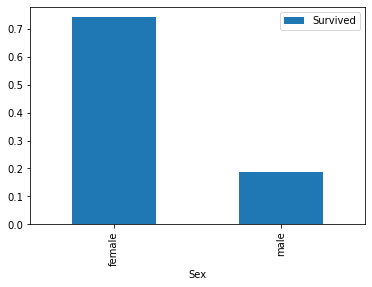

In [14]:
sex_pivot.plot.bar()
plt.show()

In [15]:
Pclass_pivot = train.pivot_table(index="Pclass", values="Survived")
Pclass_pivot

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


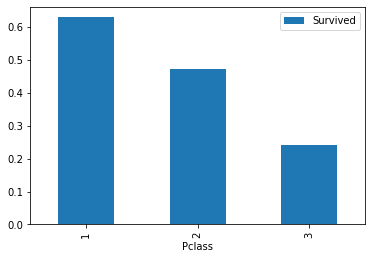

In [16]:
Pclass_pivot.plot.bar()
plt.show()

__Задание 6.__  
Выведите все уникальные значения признаков `Age`, `Sex` и `Pclass` в обучающем наборе данных.

In [17]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

In [18]:
train.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [19]:
train.Pclass.unique()

array([3, 1, 2], dtype=int64)

__Задание 7.__  
Также важно знать распределение объектов по значениям целевой переменной (`Survived`).  
Cоздайте два новых DataFrame: в первом (`survived`) будут только те объекты, у которых значение признака `Survived` равно 1, во втором (`died`) - только те объекты, у которых значение этого признака равно 0.  
Выведите количество объектов в обоих DataFrame.

In [20]:
survived = pd.DataFrame(train[train.Survived == 1])
died = pd.DataFrame(train[train.Survived == 0])

In [21]:
survived.shape

(342, 8)

In [22]:
died.shape

(549, 8)

## 3. Предобработка данных

Признаки `Sex` и `Pclass` являются номинальными (категориальными).  
Признак `Age` является количественным.

__Задание 8.__  
Выведите статистику по признаку `Age` (воспользуйтесь функцией `describe()`).

In [23]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Видно, что признак `Age` имеет меньше значений, чем количество объектов в обучающей выборке - это означает, что у некоторых объектов для этого признака значение пропущено (`NaN`).

Для замены пропущенных значений (NA/NaN) каким-либо определенным значением можно воспользоваться функцией `fillna()`.

Построим диаграмму зависимости выживания от возраста:

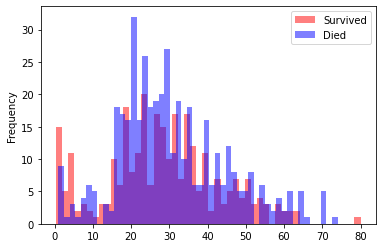

In [24]:
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

Из диаграммы видно, что для некоторых диапазонов возрастов вероятность выживания выше. Чтобы это учесть, можно преобразовать количественный признак `Age` в категориальный при помощи выделения в нем ряда диапазонов. Для этого можно воспользоваться функцией `cut()` .  
При этом необходимо помнить, что преобразования, применяемые к обучающим данным, должны быть так же применены к тестовым, иначе модели будут обучаться на данных одного вида, а тестироваться на другом виде данных.

__Задание 9.__  
Написать функцию `process_age`, которая принимает на вход `DataFrame`, границы диапазонов и названия диапазонов, а возвращает новый `DataFrame`, в котором все пропущенные значения признака `Age` заменены на `-0.5` и добавлен новый категориальный признак `Age_categories` со следующими значениями:
- "Missing" если `Age` $\in (-1, 0]$
- "Infant" если `Age` $\in (0, 5]$
- "Child" если `Age` $\in (5, 12]$
- "Teenager" если `Age` $\in (12, 18]$
- "Young_Adult" если `Age` $\in (18, 35]$
- "Adult" если `Age` $\in (35, 60]$
- "Senior" если `Age` $\in (60, 100]$

In [25]:
test.Fare.fillna(test.Fare.mean(), inplace=True)

In [26]:
def process_age(df, cut_points, label_names):
    df.Age.fillna(value = -0.5, inplace = True)
    df['Age_categories'] = pd.cut(df.Age, cut_points, labels = label_names)
    return df

cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", "Infant", "Child", "Teenager", "Young_Adult", "Adult", "Senior"]

In [27]:
train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

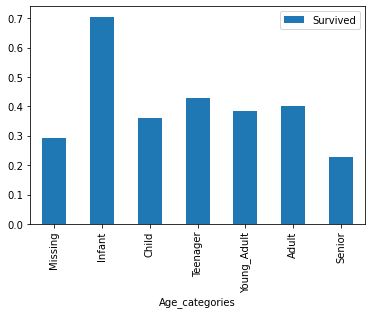

In [28]:
age_cat_pivot = train.pivot_table(index="Age_categories",values="Survived")
age_cat_pivot.plot.bar()
plt.show()

Перед применением моделей машинного обучения следует подготовить категориальные признаки (`Sex`, `Pclass` и `Age_categories`).  
Такую подготовку следует делать, даже если значениями категориального признака являются числа [1, 2, 3], как в `Pclass`. Дело в том, что отношения между классами не соответствуют отношениям между числами, например, второй класс не в два раза "ценнее" первого класса.  

Для подготовки категориальных признаков воспользуемся *бинаризацией* (*one-hot encoding*), т.е. создадим для каждого уникального значения категориального признака новый признак (*dummy variables*). Для этого можно воспользоваться функцией `get_dummies()`.

__Задание 10.__  
Напишите функцию `create_dummies`, на вход которой поступает `DataFrame` и название признака, а на выходе возвращается `DataFrame`, дополненный новыми бинарными признаками, соответствующими уникальным значениям данного входного признака.  
Примените разработанную функцию к обучающим и тестовым данным для признаков `Sex`, `Pclass` и `Age_categories`.

In [29]:
def create_dummies(df, column_name):
    df_dummies = pd.get_dummies(df, columns = [column_name])
    return df_dummies

In [30]:
train = create_dummies(train, "Pclass")
test = create_dummies(test, "Pclass")

train = create_dummies(train, "Sex")
test = create_dummies(test, "Sex")

train = create_dummies(train, "Age_categories")
test = create_dummies(test, "Age_categories")

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PassengerId                 891 non-null    int64  
 1   Survived                    891 non-null    int64  
 2   Age                         891 non-null    float64
 3   SibSp                       891 non-null    int64  
 4   Parch                       891 non-null    int64  
 5   Fare                        891 non-null    float64
 6   Pclass_1                    891 non-null    uint8  
 7   Pclass_2                    891 non-null    uint8  
 8   Pclass_3                    891 non-null    uint8  
 9   Sex_female                  891 non-null    uint8  
 10  Sex_male                    891 non-null    uint8  
 11  Age_categories_Missing      891 non-null    uint8  
 12  Age_categories_Infant       891 non-null    uint8  
 13  Age_categories_Child        891 non

In [32]:
train.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young_Adult,Age_categories_Adult,Age_categories_Senior
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,23.699966,0.523008,0.381594,32.204208,0.242424,0.206510,0.551066,0.352413,0.647587,0.198653,0.049383,0.028058,0.078563,0.401796,0.218855,0.024691
std,257.353842,0.486592,17.731181,1.102743,0.806057,49.693429,0.428790,0.405028,0.497665,0.477990,0.477990,0.399210,0.216787,0.165232,0.269207,0.490536,0.413702,0.155270
min,1.000000,0.000000,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,6.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,24.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young_Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,0,0,1,0,0
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,0,0,0,1,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,0,0,1,0,0
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,0,0,1,0,0


## 4. Train/validation/test datasets

Для выбора моделей и подбора их параметров нужно уметь оценивать качество моделей. Чтобы вычислить метрики качества, необходимо знать правильные ответы (значения целевой переменной). Мы знаем правильные ответы для обучающего набора данных (`train`), но если мы будем оценивать качество модели на тех же данных, на которых модель обучается, это приведет к *переобучению* (*overfitting*) - ситуации, когда модель хорошо работает на известных ей данных, но имеет низкую обобщающую способность, т.е плохо предсказывает целевую переменную для новых данных.  
Поэтому качество модели оценивают с использованием *отложенной выборки* (*hold-out set*) - таких данных, для которых известны правильные ответы, но эти данные не использовались в процессе обучения.  
Есть два основных способа использования отложенной выборки:  
1. случайное разделение исходных размеченных данных на обучающую и тестовую выборки;
1. k-кратная перекрестная проверка (k-fold cross-validation).  
  
В случае, когда такие отложенные тестовые данные используются для подбора параметров моделей, их называют *валидационными* (*validation*).


__Задание 11.__  
Разделите исходную размеченную выборку на обучающую (80%) и валидационную (20%).  
Можно использовать функцию `train_test_split()` с параметром `random_state=42` .  
Выведите размерность получившихся массивов данных.

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
y = train.Survived
train_surv = train.copy()
train.drop('Survived', axis=1, inplace=True)

In [36]:
X_train, X_val, y_train, y_val = train_test_split(train, y, test_size = 0.2, random_state = 42)

In [37]:
X_train.shape

(712, 17)

In [38]:
X_val.shape

(179, 17)

In [39]:
y_train.shape

(712,)

In [40]:
y_val.shape

(179,)

## 5. Построение моделей и оценка качества

__Задание 12.__  
1. Обучите логистическую регрессию для предсказания целевой переменной на обучающем наборе данных.
1. Выведите значения весовых коэффициентов построенной модели.
1. Выведите значения, возвращаемые моделью (степень уверенности модели), для первых десяти примеров из обучающих данных.
1. Выведите совместно предсказания модели и истинные ответы для первых десяти примеров из обучающих данных.

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log_reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)

In [43]:
y_pred_train = log_reg.predict(X_train)
y_proba_train = log_reg.predict_proba(X_train)

In [44]:
y_pred_val = log_reg.predict(X_val)

In [45]:
# коэффициенты
log_reg.coef_

array([[ 3.65731830e-04, -1.19581947e-02, -3.92182082e-01,
        -2.98228241e-01,  5.71642470e-03,  7.42305232e-01,
         2.52646990e-01, -7.61876411e-01,  1.51794031e+00,
        -1.28486450e+00, -6.90424557e-01,  1.75649258e+00,
         1.85193696e-01, -5.85909722e-01, -1.13156563e-01,
        -2.75591300e-01, -4.35283245e-02]])

In [46]:
# Степень уверенности
y_proba_train[0:10]

array([[0.6850138 , 0.3149862 ],
       [0.68495867, 0.31504133],
       [0.88657104, 0.11342896],
       [0.905446  , 0.094554  ],
       [0.62672496, 0.37327504],
       [0.37320011, 0.62679989],
       [0.66976072, 0.33023928],
       [0.78456798, 0.21543202],
       [0.91482941, 0.08517059],
       [0.66876252, 0.33123748]])

In [47]:
# Первые 10 элементов
for i in range(0, 10):
    print("{}) {} - {}".format(i, y_pred_train[i], np.array(y_train)[i]))

0) 0 - 0
1) 0 - 0
2) 0 - 0
3) 0 - 0
4) 0 - 0
5) 1 - 0
6) 0 - 0
7) 0 - 0
8) 0 - 0
9) 0 - 1


__Задание 13.__  
1. Выведите значение метрики `accuracy` построенной модели логистической регрессии для обучающих и валидационных данных.
1. Выведите матрицу ошибок (*confusion matrix*) для обучающих и валидационных данных.

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
log_reg.score(X_train, y_train)

0.824438202247191

In [50]:
log_reg.score(X_val, y_val)

0.8044692737430168

In [51]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
(tn, fp, fn, tp)

(397, 47, 78, 190)

In [52]:
tn, fp, fn, tp = confusion_matrix(y_val, y_pred_val).ravel()
(tn, fp, fn, tp)

(93, 12, 23, 51)

__Задание 14.__  
Получите значения метрики `accuracy` для логистической регрессии при помощи процедуры перекрестной проверки по 10 блокам (*10-fold cross-validation*) ([Cross-validation: evaluating estimator performance](https://scikit-learn.org/stable/modules/cross_validation.html)).  
Можно воспользоваться функциями [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) или [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) .  
Выведите значения `accuracy` для всех разбиений, а также максимум, минимум и среднее.  
Сравните полученные результаты с оценками на основе отложенной выборки.

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
cvs_train = cross_val_score(LogisticRegression(max_iter = 1000), X_train, y_train, cv = 10, scoring='accuracy')
cvs_train

array([0.84722222, 0.79166667, 0.73239437, 0.97183099, 0.87323944,
       0.76056338, 0.77464789, 0.77464789, 0.76056338, 0.91549296])

In [55]:
cvs_val = cross_val_score(LogisticRegression(max_iter = 1000), X_val, y_val, cv = 10, scoring='accuracy')
cvs_val

array([0.83333333, 0.61111111, 1.        , 0.88888889, 0.72222222,
       0.83333333, 0.83333333, 0.72222222, 0.88888889, 0.82352941])

In [56]:
print("Сравнение: Тренировочные - тестовые")
print("Минимум - {} - {}".format(cvs_train.min(), cvs_val.min()))
print("Максимум - {} - {}".format(cvs_train.max(), cvs_val.max()))
print("Среднее - {} - {}".format(cvs_train.mean(), cvs_val.mean()))

Сравнение: Тренировочные - тестовые
Минимум - 0.7323943661971831 - 0.6111111111111112
Максимум - 0.971830985915493 - 1.0
Среднее - 0.820226917057903 - 0.815686274509804


__Задание 15.__  
Постройте простой базовый классификатор (*baseline*) для сравнения с моделями машинного обучения.  
Пусть базовый классификатор предсказывает выживание только женщин (вспомните соотношение выживаемости женщин и мужчин в обучающем наборе данных).  
Получите значение `accuracy` для такого классификатора на всех размеченных данных.

In [57]:
from sklearn.dummy import DummyClassifier

In [58]:
train_fem = train_surv[train_surv.Sex_female == 1]

In [59]:
y_train_fem = train_fem.Survived
train_fem.drop('Survived', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(train_fem, y_train_fem)

DummyClassifier(strategy='most_frequent')

In [61]:
dummy_clf.predict(train_fem)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [62]:
dummy_clf.score(X_val, y_train_fem)

0.7420382165605095

## 6. Предсказание на новых данных

__Задание 16.__  
1. Обучите логистическую регрессию на всех доступных размеченных данных (`train.csv`).  
1. Получите предсказание для тестовых данных (`test.csv`).

In [63]:
reg = LogisticRegression(max_iter=1000).fit(train, y)

In [64]:
y_pred = reg.predict(test)

__Задание 17.__  
Создайте файл с результатами (*submission*) для отправки на сервер Kaggle.

In [65]:
test_ids = test["PassengerId"]
submission_df = {"PassengerId": test_ids,
                 "Survived": y_pred}
submission = pd.DataFrame(submission_df)

In [66]:
submission.to_csv('titanic_submission.csv', index=False)

__Задание 18.__  
Отправьте полученный файл на сервер Kaggle.  
Для этого нужно:
1. Зарегистрироваться на [Kaggle](https://www.kaggle.com).
1. Принять участие в [соревновании](https://www.kaggle.com/c/titanic/) (*Join Competition*).
1. Отправить файл с результатами (*Submit Predictions*).  

Проверьте в таблице результатов, что ваш результат принят.